# Computational methods in Physics
## Week 11
#### Prof. Michael Wood-Vasey
##### [based on materials from Prof. Brian D'Urso]
##### University of Pittsburgh, Department of Physics and Astronomy

* Analytical Fourier Series and Transforms
* Discrete Fourier Transforms

#### Fourier Series
For a periodic function $y(t)$ with period $T$:
\begin{equation*}
y(t) = \frac{a_{0}}{2} + \sum_{n=1}^{\infty} \left(a_{n} \cos
n\omega t + b_{n} \sin n\omega t
\right)
\end{equation*}
The Fourier coefficients can be determined with:
\begin{equation*}
\begin{pmatrix}a_n \\ b_n\end{pmatrix}  =\frac{2}{T} 
  \int _{0}^{T} \begin{pmatrix}\cos n\omega t  \\ \sin n\omega t \end{pmatrix} \ y(t) \ dt
\end{equation*}
Notes:
* $a_{0} = 2 \left\langle y(t)\right\rangle$, $b_{0} = 0$.
* If $y(t)$ odd: $y(-t) = - y(t)$  $\Rightarrow$  $a_{n} \equiv 0$.
* If $y(t)$ even: $y(-t) = y(t)$ $\Rightarrow$ $b_{n} \equiv 0$.

#### Fourier Transforms
For a function $y(t)$ defined at all times:
\begin{equation*}
y(t)=\int_{-\infty}^{+\infty} Y(\omega)\, \frac{e^{+i\omega t}} {\sqrt{2\pi}} \  d\omega
\end{equation*}
Fourier transform $Y(\omega)$ can be determined with:
\begin{equation*}
Y(\omega)=\int_{-\infty}^{+\infty} y(t)\, \frac{e^{-i\omega t}} {\sqrt{2\pi}} \ dt
\end{equation*}
Notes:

* If $y(t)$ odd and real: $y(-t) = - y(t)$  $\Rightarrow$ $Y(\omega)$ is imaginary.
* If $y(t)$ even and real: $y(-t) = y(t)$ $\Rightarrow$ $Y(\omega)$ is real.
* If $y(t)$ is purely real $\Rightarrow Y(-\omega)=\overline{Y(\omega)}$.
* Power Spectrum: $\propto \left| Y(\omega)\right|^{2}$

#### Discrete Fourier Transforms (DFT)
For numerical evaluation, we have to use a finite range for $t$
and $N$ discrete samples of $y(t)$:

* $y_{k} = y(t_{k})$, $k = 0, 1,\ldots, N-1$.
* Uniform time steps $\Delta t \rightarrow t_{k} = k \Delta t$.
* Assume periodicity $y(t+T) = y(t)$, $T=N\Delta t$.

The DFT will give us $Y(\omega)$ at $N$ discrete values $Y_k=Y(\omega_k)$:

* $\omega_k = k \Delta \omega, \qquad k = 0, 1, \ldots , N-1$.
* $\Delta \omega = \frac{2\pi}{T}=\frac{2\pi}{N\Delta t}$.
* $Y(\omega_k)$ is also periodic: $Y(\omega_{n+N})=Y(\omega_{n})$,
	so we can also shift the range of $k$.

#### Discrete Fourier Transforms (DFT)
The formula for the forward DFT is:
\begin{equation*}
Y(\omega_{n}) = \sum_{k=0}^{N-1}\Delta t\, y(t_{k})\frac{e^{-i\omega_{n}t_{k}}}{\sqrt{2\pi}}
\end{equation*}

* $t_{k} = k \Delta t, \qquad k = 0, 1,\ldots, N-1$.

The inverse transform is:
\begin{equation*}
y(t) = \sum_{n=0}^{N-1}\frac{2\pi}{N\Delta t}\, \frac{e^{i \omega_{n}t}}{\sqrt{2\pi}} Y(\omega_{n})
\end{equation*}

* $\omega_k = k \Delta \omega, \qquad k = 0, 1, \ldots , N-1$.
* $\Delta \omega = \frac{2\pi}{T}=\frac{2\pi}{N\Delta t}$

#### Fast Fourier Transform (FFT)
The FFT is an efficient algorithm for computing the DFT
when $N$ is an integer power of 2.
FFTs in Numpy:

* `numpy.fft` module:

* Online documentation:
http://docs.scipy.org/doc/numpy/reference/routines.fft.html
* Python help: `help(numpy.fft)`

* `numpy.fft` functions:

* `numpy.fft.fft` -- Discrete Fourier transform.
* `numpy.fft.ifft` -- Inverse discrete Fourier transform.
* `numpy.fft.rfft` -- Real discrete Fourier transform.
* `numpy.fft.irfft` -- Inverse real discrete Fourier transform.

#### Fast Fourier Transform (FFT)
In `numpy.fft`, the DFT is defined as:
\begin{equation*}
A_{k} = \sum_{n=0}^{N-1}a_n e^{-2\pi i n k/N} \qquad k=0, 1, \ldots, N-1 \qquad \Delta f = \tfrac{1}{N\Delta t}
\end{equation*}

* The values in the result follow "standard" order: If `A = numpy.fft.fft(a, N)` $\rightarrow$ `A[0]` contains the zero-frequency term, which is purely real for real inputs.
* `A[1:N/2]` contains the positive-frequency terms, and `A[N/2+1:]` contains the negative-frequency terms, in order of decreasingly negative frequency.
* For even $N$, `A[N/2]` represents both positive and negative Nyquist frequency, and is also real for real input.
* For odd $N$, `A[(N-1)/2]` contains the largest positive frequency, while `A[(N+1)/2]` contains the largest negative frequency.

#### Fast Fourier Transform (FFT)

* `numpy.fft.fftfreq(N)` returns an array giving the frequencies of corresponding elements in the output.
* The routine `np.fft.fftshift(A)` shifts transforms and their frequencies to put the zero-frequency components in the middle, and `numpy.fft.ifftshift(A)` undoes that shift.

The inverse DFT is defined as:
\begin{equation*}
a_n = \frac{1}{N}\sum_{k=0}^{N-1}A_k e^{2\pi i n k/N} \qquad n=0, 1, \ldots, N-1
\end{equation*}

In [59]:
import matplotlib.pyplot as plt

def show_fft(func=np.sin, time_min=1, time_max=100, N=1000, **kwargs):
    time = np.linspace(time_min, time_max, N)
    y = func(time, **kwargs)
    
    fts = np.fft.rfft(y)
    fts /= len(fts)
    time_range = time[-1] - time[0]
    freq = np.arange(len(fts))/float(time_range)
    
    plt.figure(figsize=(11,8))
    nr, nc = 2, 2
    plt.subplot(nr, nc, 1)
    plt.plot(time, y)
    plt.xlabel("Time [t]")
    plt.ylabel("f(t)")
    
    plt.subplot(nr, nc, 2)
    plt.plot(freq, np.real(fts))
    plt.xlabel("Frequency")
    plt.ylabel(r"real(F($\omega$))")
    
    plt.subplot(nr, nc, 3)
    plt.plot(freq, np.imag(fts))
    plt.xlabel("Frequency")
    plt.ylabel(r"imaginary(F($\omega$))")
    
    plt.subplot(nr, nc, 4)
    plt.plot(freq, np.abs(fts))
    plt.xlabel("Frequency")
    plt.ylabel(r"abs(F($\omega$))")
    

In [40]:
%matplotlib inline


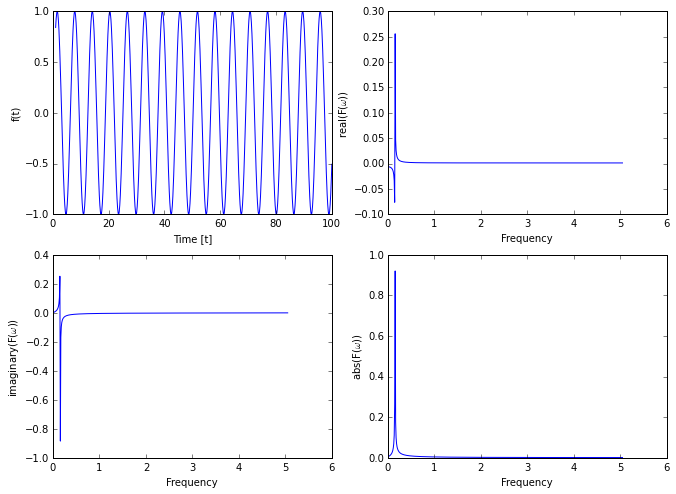

In [46]:
show_fft()

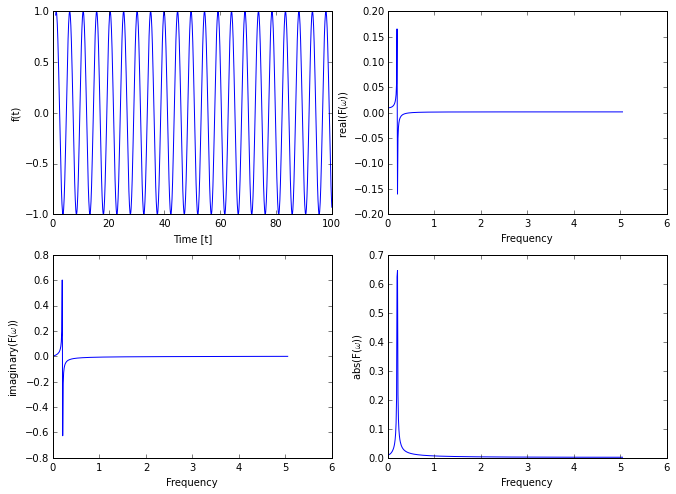

In [67]:
from collections import OrderedDict

from ipywidgets import interact, interactive, fixed
from IPython.display import clear_output, display, HTML

def sin_one(t, a=1, **kwargs):
    return np.sin(a*t)

def sin_two(t, a=1, **kwargs):
    return np.sin(a*t) + np.sin(2*t)

def sin_three(t, a=1, **kwargs):
    return np.sin(a*t) + np.sin(2*t) + np.sin(3*t)

def sin_four(t, **kwargs):
    return np.sin(a*t) + np.sin(2*t) + np.sin(3*t) + np.sin(4*t)

def sin_exp(t, a=1, b=2, c=0.5, **kwargs):
    return np.sin(a*t) + b*t + np.exp(-t/c)
    
func_options = OrderedDict([('sin(t)', sin_one), 
                            ('sin(t) + sin(2*t)', sin_two),
                            ('sin(t) + sin(2*t) + sin(3*t)', sin_three),
                            ('sin(t) + sin(2*t) + sin(3*t) + sin(4*t)', sin_four),
                            ('sin(a*t) + b*t + exp(-t/c)', sin_exp)])

interactive(show_fft, func=func_options, a=(0, 10, 0.1), b=(-10,+10,1), c=(0, 10, 1))

#### Additional Notes on Real FFTs

* If all the $a_k$ are real, the negative frequency terms are just the complex conjugates of the corresponding positive-frequency terms.
* `numpy.fft.rfft` does not compute the negative frequency terms, and the length of the output is `N/2+1`.
* If `A = numpy.fft.rfft(a)`, `A[0]` contains the zero-frequency term, which must be purely real.
* If `N` is even, `A[-1]` contains the term for frequencies `N/2` and `-N/2`, and must also be purely real.
* If `N` is odd, `A[-1]` contains the term for frequency `A[(N-1)/2]`, and is complex in the general case.